<a href="https://colab.research.google.com/github/tracy2811/DataScience-Projects/blob/master/TimeSeries/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series

[Guide](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)

## Read dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd /content/drive/My\ Drive/Colab\ Notebooks/TimeSeries

/content/drive/My Drive/Colab Notebooks/TimeSeries


In [5]:
import pandas as pd
dateparse = lambda date: pd.datetime.strptime(date, '%d-%m-%Y %H:%M')
train = pd.read_csv('Train_SU63ISt.csv',
                    parse_dates=['Datetime'],
                    index_col='Datetime',
                    date_parser=dateparse)
train.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


In [0]:
train.drop('ID', axis=1, inplace=True)

In [7]:
train.index

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq=None)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18288 entries, 2012-08-25 00:00:00 to 2014-09-25 23:00:00
Data columns (total 1 columns):
Count    18288 non-null int64
dtypes: int64(1)
memory usage: 285.8 KB


In [0]:
train.sort_values(by=['Datetime'], inplace=True, ascending=True)

## Check stationarity

> A TS is stationary if its statistical properties such as mean, variance remain constant over time.

> Most of TS models work on the assumption that the TS is stationary.

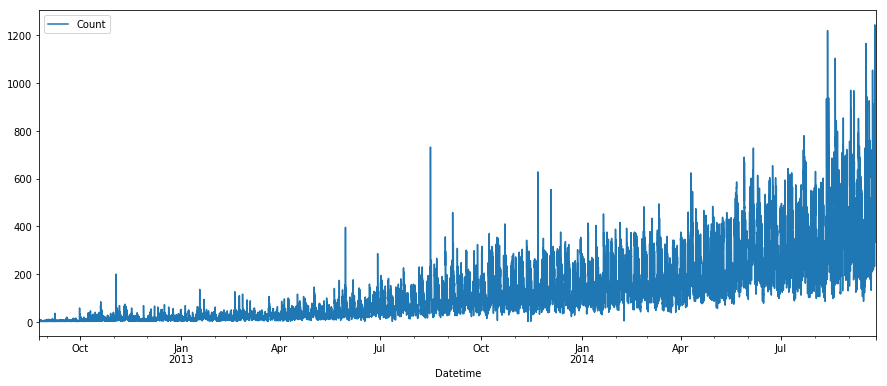

In [11]:
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
train.plot()

Overall increasing trend

* Plot rolling statistics

* Dickey-Fuller test

   test statistic > critical value: not stationary
   
   test statistic < critical value: stationary
   
    p-value > 0.05: non-stationary.
    
    p-value <= 0.05: stationary.


In [0]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts):
  # Rolling statistics
  rolmean = ts.rolling(24).mean()
  rolstd = ts.rolling(24).std()
  
  # Plot rolling statistics:
  orig = plt.plot(ts, color='blue', label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label='Rolling std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)
  
  # Dickey-Fuller test
  result = adfuller(ts['Count'])
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

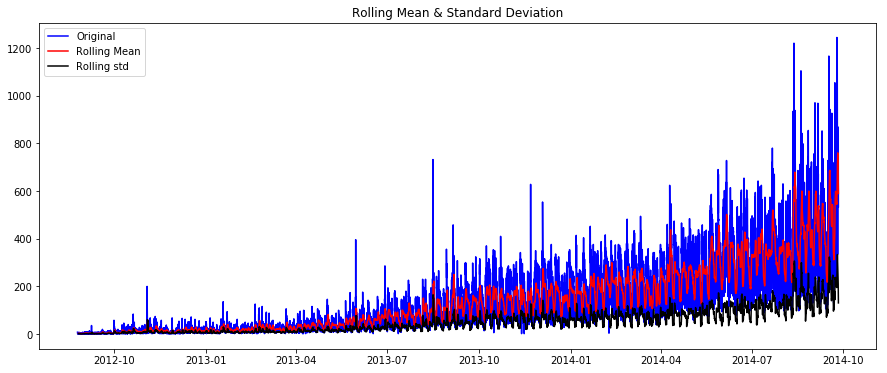

ADF Statistic: -4.456561
p-value: 0.000235
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [20]:
test_stationarity(train)

Training data is not stationary

## Make Time Series Stationary

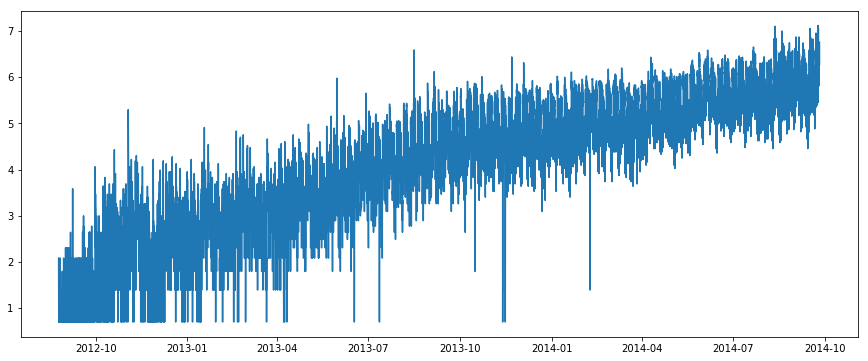

In [24]:
import numpy as np
train_log = np.log(train)
plt.plot(train_log)

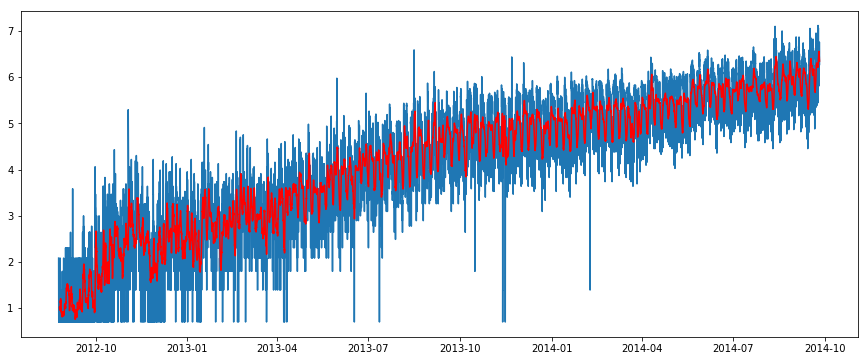

In [25]:
moving_avg = train_log.rolling(24).mean()
plt.plot(train_log)
plt.plot(moving_avg, color='red')

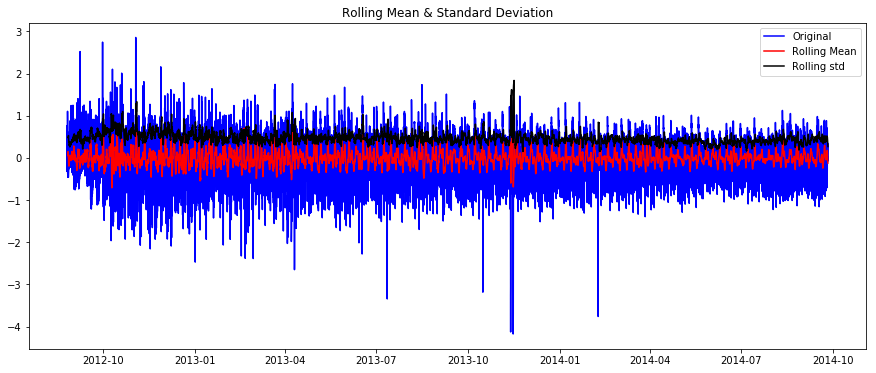

ADF Statistic: -21.316940
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [27]:
train_log_moving_avg_diff = train_log - moving_avg
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

## Forecast a Time Series

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


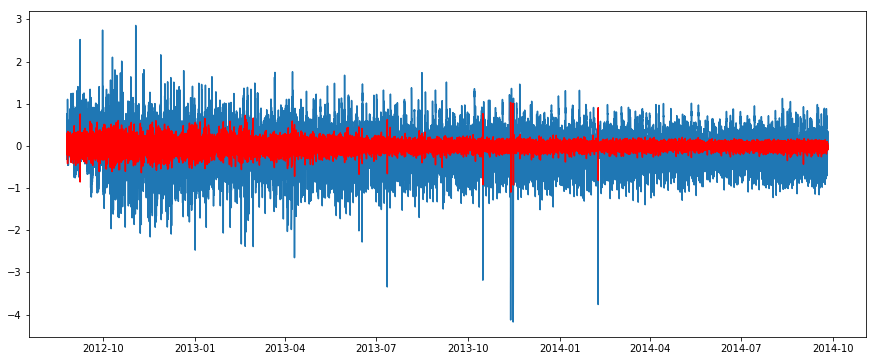

In [28]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_log_moving_avg_diff, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(train_log_moving_avg_diff)
plt.plot(results_AR.fittedvalues, color='red')